## Titanic Dataset - EDA, Preprocessing, Model Building & Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data=data.drop(['PassengerId','Ticket','Name'],axis=1)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
data.shape

(891, 9)

In [8]:
# 1.Identify all null values in the dataset
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# 1.Identify all null values in the dataset
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
687/891

0.7710437710437711

#### About 77% of the values in the Cabin column are missing, so it doesn’t provide useful information for my model. Therefore, I decided to drop this column.

In [11]:
data=data.drop("Cabin",axis=1)

In [12]:
177/891

0.19865319865319866

In [13]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [14]:
data["Age"]=data.groupby('Pclass')['Age'].transform(lambda x :x.fillna(x.median()))

In [15]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [16]:
data["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [17]:
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

In [19]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
# 2.find and remove duplicate records if theu exist
data.duplicated().sum()

np.int64(116)

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

np.int64(0)

<Axes: >

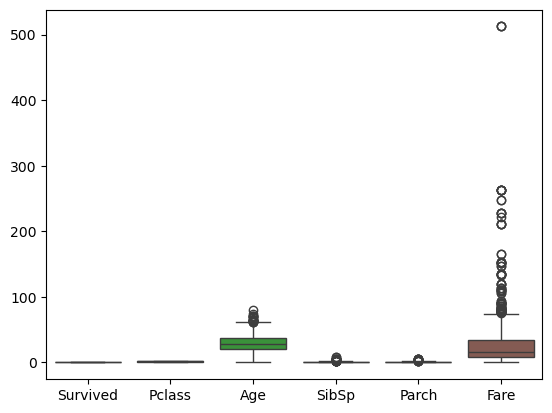

In [23]:
# detect outlier in numerical columns using boxplots or statistical methods
sns.boxplot(data=data)

#### From the above, I observed that there are many outliers in the fare feature and only a few outliers in age.

In [25]:
q1,q2,q3=np.percentile(data["Age"],[25,50,75])

In [26]:
q1,q2,q3

(np.float64(21.0), np.float64(28.0), np.float64(37.0))

In [27]:
data["Age"].dtype

dtype('float64')

In [28]:
iqr=q3-q1
iqr

np.float64(16.0)

In [29]:
lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr
lower_whisker,upper_whisker

(np.float64(-3.0), np.float64(61.0))

In [30]:
data[(data["Age"]<lower_whisker) | (data["Age"]>upper_whisker)]["Age"]

33     66.0
54     65.0
96     71.0
116    70.5
252    62.0
275    63.0
280    65.0
438    64.0
456    65.0
483    63.0
493    71.0
545    64.0
570    62.0
630    80.0
672    70.0
745    70.0
829    62.0
851    74.0
Name: Age, dtype: float64

#### In the age column there is a ouliers present .but those are not much affect on my model

In [31]:
q1,q2,q3=np.percentile(data["Fare"],[25,50,75])

In [32]:
iqr=q3-q1
iqr

np.float64(26.325)

In [33]:
lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr
lower_whisker,upper_whisker

(np.float64(-31.437499999999996), np.float64(73.8625))

In [34]:
data[(data["Fare"]<lower_whisker) | (data["Fare"]>upper_whisker)]["Fare"]

27     263.0000
31     146.5208
34      82.1708
52      76.7292
61      80.0000
         ...   
829     80.0000
835     83.1583
849     89.1042
856    164.8667
879     83.1583
Name: Fare, Length: 97, dtype: float64

In [35]:
# Handle ouliers using an appropriate methods(capping)
def capping(x):
  if x <lower_whisker:
    x=lower_whisker
  elif x>upper_whisker:
    x=upper_whisker
  else:
    return x
  return x

In [36]:
data["Fare"]=data["Fare"].apply(capping)

In [37]:
data[(data["Fare"]<lower_whisker) | (data["Fare"]>upper_whisker)]["Fare"]

Series([], Name: Fare, dtype: float64)

<Axes: >

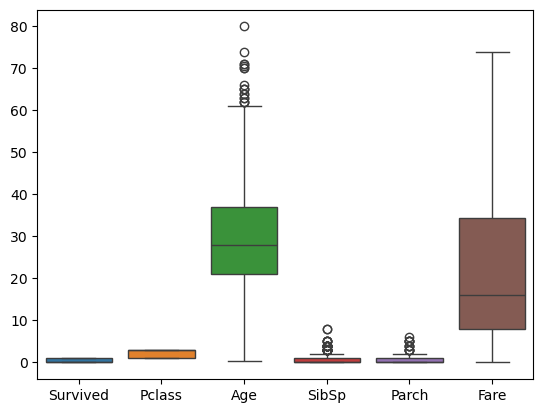

In [38]:
sns.boxplot(data=data)

In [39]:
# Select the target variable
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### I chose **Survived** as the target and analyzed the relationships between the target and the features.

In [41]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: ylabel='Parch'>

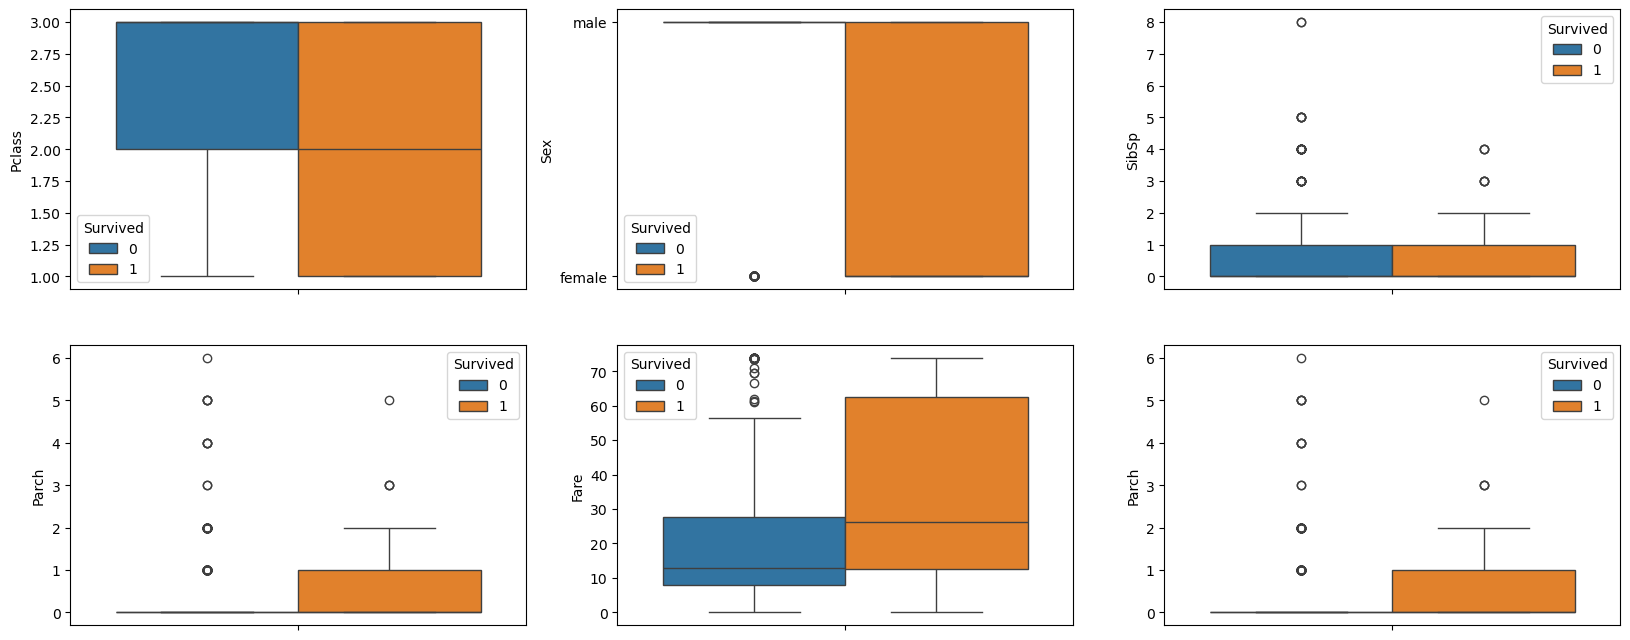

In [42]:
fig,ax=plt.subplots(2,3,figsize=(20,8))
sns.boxplot(data=data,y="Pclass",hue="Survived",ax=ax[0,0])
sns.boxplot(data=data,y="Sex",hue="Survived",ax=ax[0,1])
sns.boxplot(data=data,y="SibSp",hue="Survived",ax=ax[0,2])
sns.boxplot(data=data,y="Parch",hue="Survived",ax=ax[1,0])
sns.boxplot(data=data,y="Fare",hue="Survived",ax=ax[1,1])
sns.boxplot(data=data,y="Parch",hue="Survived",ax=ax[1,2])

#### There is assocations between feature and target.these are not that much of assocations.

### 3.seggregation of data features and target

In [43]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [44]:
x=data.drop("Survived",axis=1)

In [45]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [46]:
y=data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 775, dtype: int64

### train test split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((620, 7), (155, 7), (620,), (155,))

### train data preprocessing

In [50]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
64,1,male,37.0,0,0,27.7208,C
102,1,male,21.0,0,1,73.8625,S
433,3,male,17.0,0,0,7.1250,S
284,1,male,37.0,0,0,26.0000,S
226,2,male,19.0,0,0,10.5000,S
...,...,...,...,...,...,...,...
676,3,male,24.5,0,0,8.0500,S
94,3,male,59.0,0,0,7.2500,S
747,2,female,30.0,0,0,13.0000,S
523,1,female,44.0,0,1,57.9792,C


#### I chose **Survived** as the target and analyzed the relationships between the target and the features.

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [52]:
ohe=OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohe

OneHotEncoder(sparse_output=False)

In [53]:
minmax=MinMaxScaler().set_output(transform="pandas")
minmax

MinMaxScaler()

In [54]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [55]:
ct=ColumnTransformer([("encoding",ohe,["Sex","Embarked"]),("scaling",minmax,['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])],
                     remainder="passthrough",verbose_feature_names_out=False).set_output(transform="pandas")

In [56]:
x_train_transformed=ct.fit_transform(x_train)

In [57]:
x_train_transformed.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
64,0.0,1.0,1.0,0.0,0.0,0.0,0.459663,0.0,0.000000,0.375303
102,0.0,1.0,0.0,0.0,1.0,0.0,0.258608,0.0,0.166667,1.000000
433,0.0,1.0,0.0,0.0,1.0,1.0,0.208344,0.0,0.000000,0.096463
284,0.0,1.0,0.0,0.0,1.0,0.0,0.459663,0.0,0.000000,0.352005
226,0.0,1.0,0.0,0.0,1.0,0.5,0.233476,0.0,0.000000,0.142156


### Model building

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [60]:
knn.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [61]:
knn.score(x_train_transformed,y_train)

0.8435483870967742

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt=DecisionTreeClassifier()

In [64]:
dt.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [65]:
dt.score(x_train_transformed,y_train)

0.9854838709677419

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier()
rf

RandomForestClassifier()

In [68]:
rf.fit(x_train_transformed,y_train)

RandomForestClassifier()

In [69]:
rf.score(x_train_transformed,y_train)

0.9854838709677419

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gb=GradientBoostingClassifier()

In [72]:
gb.fit(x_train_transformed,y_train)

GradientBoostingClassifier()

In [73]:
gb.score(x_train_transformed,y_train)

0.9016129032258065

### Test data preprocessing

In [75]:
x_test_transformed=ct.transform(x_test)

In [76]:
x_test_transformed

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
170,0.0,1.0,0.0,0.0,1.0,0.0,0.761247,0.000,0.000000,0.453545
82,1.0,0.0,0.0,1.0,0.0,1.0,0.296306,0.000,0.000000,0.105432
128,1.0,0.0,1.0,0.0,0.0,1.0,0.296306,0.125,0.166667,0.302702
4,0.0,1.0,0.0,0.0,1.0,1.0,0.434531,0.000,0.000000,0.108986
293,1.0,0.0,0.0,0.0,1.0,1.0,0.296306,0.000,0.000000,0.119817
...,...,...,...,...,...,...,...,...,...,...
672,0.0,1.0,0.0,0.0,1.0,0.5,0.874340,0.000,0.000000,0.142156
97,0.0,1.0,1.0,0.0,0.0,0.0,0.283740,0.000,0.166667,0.857787
365,0.0,1.0,0.0,0.0,1.0,1.0,0.371701,0.000,0.000000,0.098155
680,1.0,0.0,0.0,1.0,0.0,1.0,0.296306,0.000,0.000000,0.110171


### Model evaluation

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
y_pred=knn.predict(x_test_transformed)

In [79]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0])

In [80]:
accuracy_score(y_pred,y_test)

0.7935483870967742

In [81]:
y_pred=dt.predict(x_test_transformed)

In [82]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1])

In [83]:
accuracy_score(y_pred,y_test)

0.7419354838709677

In [84]:
y_pred=rf.predict(x_test_transformed)

In [85]:
accuracy_score(y_pred,y_test)

0.7483870967741936

In [86]:
y_pred=gb.predict(x_test_transformed)

In [87]:
accuracy_score(y_pred,y_test)

0.7870967741935484